In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Missing values imputation

### Dataset 2

C:\Users\Afonso\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


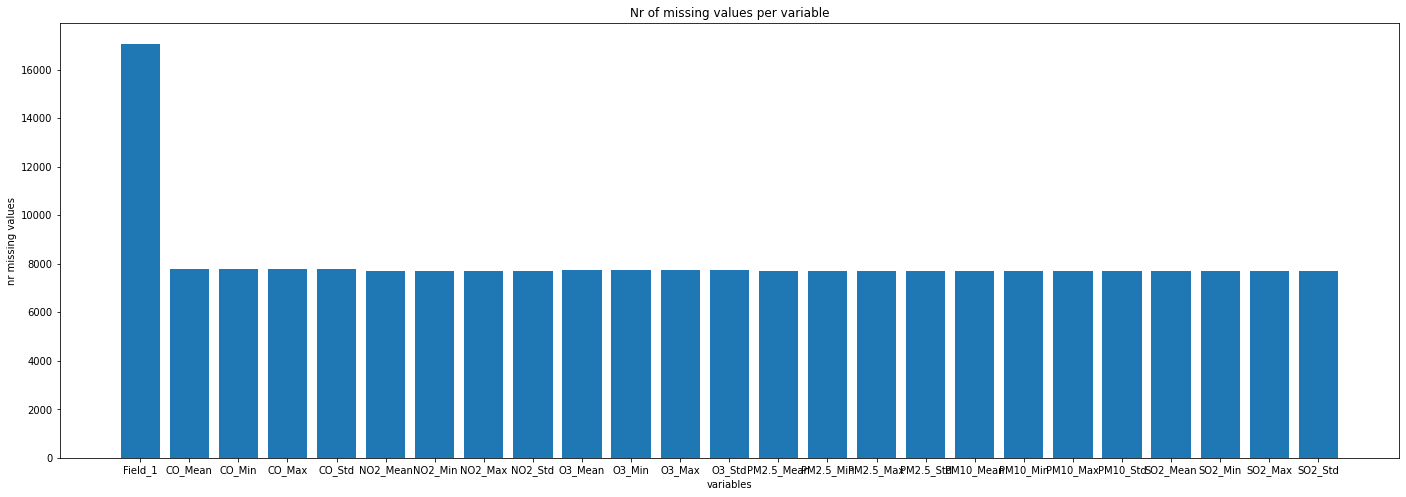

Dropped variables []
(161631, 32)


In [38]:
dataset_2 = pd.read_csv('dataset_2/air_quality_tabular.csv', na_values='NaN')
new_dataset_2 = dataset_2.copy()

#FIND VARIABLES WITH MISSING VALUES
mv = {}
for var in new_dataset_2:
    nr = new_dataset_2[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plt.figure(figsize=(24,8))
plt.bar(list(mv.keys()), list(mv.values()))
plt.title('Nr of missing values per variable')
plt.xlabel('variables')
plt.ylabel('nr missing values')
plt.show()

#DISCARD COLUMNS WITH MORE THEN 90% MISSING VALUES
threshold = new_dataset_2.shape[0] * 0.90

missings = [c for c in mv.keys() if mv[c]>threshold]
new_dataset_2.drop(columns=missings, inplace=True)
print('Dropped variables', missings)

#DISCARD RECORDS WITH MAJORITY OF MISSING VALUES
threshold = new_dataset_2.shape[1] * 0.50

new_dataset_2.dropna(thresh=threshold, inplace=True)
print(new_dataset_2.shape)

for column in mv:
    if column != "Field_1":
        vars = dataset_2[column]
        mean_vars = int(vars.mean())
        dataset_2[column].fillna(mean_vars,inplace=True)
    # else: # VER FIELD_1